[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ncerdan/HandsOnML/blob/master/04_Training_Models.ipynb)

# Linear Regression

## The Normal Equation

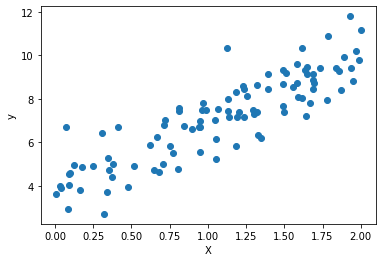

In [30]:
# make the data set
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1);
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [31]:
# now lets compute theta using the normal equation
X_b = np.c_[np.ones((100, 1)), X]   # adds x0 = 1 in front of all x rows in X
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best  # close to 4, 3 but noise of randomness made it adjust

array([[3.88430285],
       [3.03351687]])

In [32]:
# now can make predictions with it
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.88430285],
       [9.95133658]])

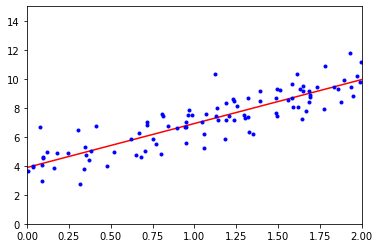

In [33]:
# visualize predictions
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [34]:
# now do it using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)    # notice it splits bias term from others

print(lin_reg.predict(X_new))

[3.88430285] [[3.03351687]]
[[3.88430285]
 [9.95133658]]


In [35]:
# this class is based on the scipy least squares function which you can use directly
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd  #same as above

# this function computes pseudoinverse of X

array([[3.88430285],
       [3.03351687]])

In [36]:
# can use pinv to compute pseudoinverse directly too
np.linalg.pinv(X_b).dot(y)  # same too!

# this method is more efficient and can handle situation where inversion not possible

array([[3.88430285],
       [3.03351687]])

## Batch Gradient Descent

In [37]:
# uses the whole batch of X at each iteration
eta = 0.1   # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)   # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)   # from calculus
    theta = theta - eta * gradients

theta   # same as normal equation!

array([[3.88430285],
       [3.03351687]])

## Stochastic Gradient Descent

In [38]:
# implements SGD with simple learning schedule
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparams

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)   # still random init

for epoch in range(n_epochs):
    for i in range(m):                          # m iterations per round
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta       # really close in only 50 rounds!

array([[3.89755857],
       [2.98749325]])

In [39]:
# to use this in sklearn use SGD
# defaults to minimizing squared error
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)  # tol = tolerance to terminate
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.84356859]), array([3.02454425]))

# Polynomial Regression



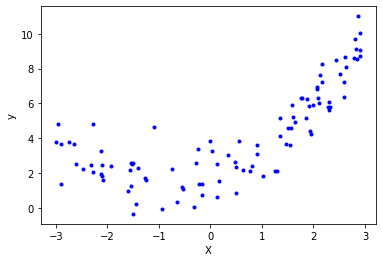

In [40]:
# make nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [41]:
# use sklearn's PolynomialFeatures to add the square of each feature as a new feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

# also adds combinations of features
# e.g. a, b --> poly_features(degree=3) --> a, a^2, a^3, b^2, b^3, ab, a^2b, ab^2

[1.55935229]
[1.55935229 2.43157956]


In [42]:
# now we can just fit it using LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.81850338]), array([[0.94691499, 0.55544076]]))

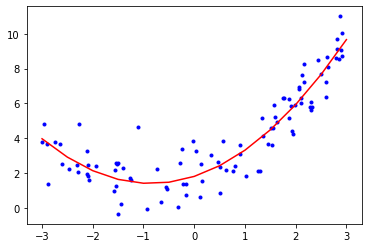

In [43]:
# visualize it
X_disp = np.arange(-3, 3.5, 0.5)

X_disp_poly = poly_features.fit_transform(X_disp.reshape(-1, 1))
y_disp = lin_reg.predict(X_disp_poly)

plt.plot(X, y, 'b.')
plt.plot(X_disp, y_disp, 'r-')
plt.show()

## Learning Curves

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, 80, 0, 3])
    plt.legend()
    plt.show()

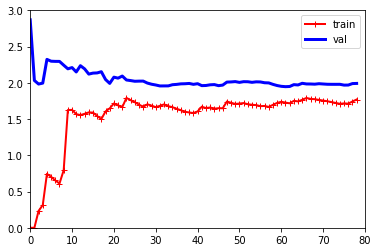

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# both training and validation errors are similar but high = underfitting

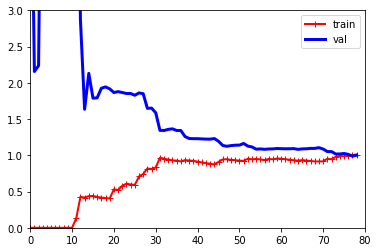

In [46]:
# now lets try it using a 10-degree polynomial
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# Notes:
#   lower error on training data, and gap between training and validation = overfitting

# Regularized Linear Models

## Ridge Regression

In [49]:
# closed form
from sklearn.linear_model import Ridge
# alpha = scaling of factorization term
# solver = matrix factorization method
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.27904805]])

In [52]:
# also using SGD
# penalty = regularization term (l2 makes it same as Ridge Regression)
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.27417415])

## Lasso Regression

In [53]:
# small example
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.24878465])

In [54]:
# alternatively
# penalty = l1 makes it same as Lasso Regression
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.23371038])

## Elastic Net

In [55]:
# small example
from sklearn.linear_model import ElasticNet
# l1_ratio = r (from notes)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.24839287])

In [56]:
# alternatively
# penalty = elasticnet makes it same as Lasso Regression
sgd_reg = SGDRegressor(penalty='elasticnet')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.26363947])

## Early Stopping

In [ ]:
"""Basic Implementation.

Doesn't actually work bc not real dataset used.

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

# warm_string=True, continues training where it left off instead of starting from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)   # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
"""

# Logistic Regression